In [99]:
import pandas as pd
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
import joblib
import cv2
import random
from Preprocessing_pipline import mask_scab, mask_rust_healthy, preprocess_image
from Feature_extraction_pipline import extract_color_features, features2array


In [100]:
# Cargar los modelos guardados desde archivos
best_rf_model = joblib.load('../Modelos/best_rf_model.pkl')
best_knn_model = joblib.load('../Modelos/best_knn_model.pkl')
best_svm_model = joblib.load('../Modelos/best_svm_model.pkl')

[317, 626, 528, 448, 78]


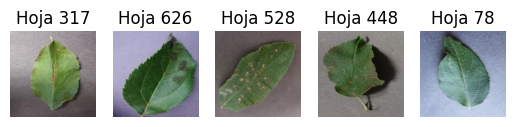

In [101]:
PATH= '..\\Base de datos\\BD 810\\'

random_images = random.sample(range(1, 811), 5)
print (random_images)
x=0
org_images = []
for i in random_images:
    x=x+1
    org_images.append (cv2.imread(PATH + str(i) + ".jpg", cv2.IMREAD_COLOR))
    plt.subplot(1,5,x)
    plt.imshow(cv2.cvtColor(org_images[-1], cv2.COLOR_BGR2RGB))
    plt.title('Hoja '+str(i))
    plt.axis('off')
plt.show()


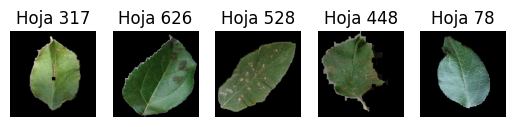

In [102]:
filtered_image = []
x=0
for i in random_images:
    x=x+1
    org_image = org_images[x-1]
    green_segmented = preprocess_image(org_image)
    filtered_image = preprocess_image(org_image)
    plt.subplot(2,5,x)
    plt.imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))
    plt.title('Hoja '+str(i))
    plt.axis('off')
plt.show()
#plt.savefig("Hojas sin fondo")



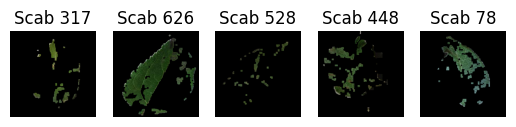

In [103]:
scab_images = []
x=0
for i in random_images:
    x=x+1
    org_image = org_images[x-1]
    scab_images.append(mask_scab(org_image))
    plt.subplot(2,5,x)
    plt.imshow(cv2.cvtColor(scab_images[-1], cv2.COLOR_BGR2RGB))
    plt.title('Scab '+str(i))
    plt.axis('off')
plt.show()
#plt.savefig("Hojas scab")

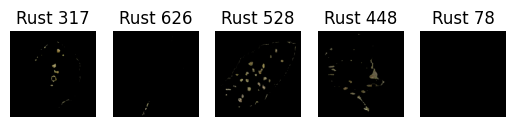

In [104]:
rust_images = []
x=0
for i in random_images:
    x=x+1
    org_image = org_images[x-1]
    rust_images.append(mask_rust_healthy(org_image))
    plt.subplot(2,5,x)
    plt.imshow(cv2.cvtColor(rust_images[-1], cv2.COLOR_BGR2RGB))
    plt.title('Rust '+str(i))
    plt.axis('off')
plt.show()
#plt.savefig("Hojas Rust")

In [105]:
df_prediction = pd.DataFrame(columns=['All Features'])
PATH= '..\\Base de datos\\BD 810\\'
x=0
for i in random_images:
    x=x+1
    org_image = org_images[x-1]
    scab_image = scab_images[x-1]
    rust_image = rust_images[x-1]
    features_org = features2array(extract_color_features(org_image))
    features_rust = features2array(extract_color_features(scab_image))
    features_scab = features2array(extract_color_features(rust_image))
    new_line = [features_scab + features_rust + features_org]
    # Agregar la nueva fila utilizando el método loc
    df_prediction.loc[len(df_prediction)] = new_line
    #new_line = {"Image ID":str(i), "Features Scab":features_scab, "Features Rust":features_rust, "Features Original":features_org}
    #df = df.append(new_line, ignore_index=True)
print (df_prediction)

#df_prediction.to_csv('..\\Base de datos\\Feature_extraction_predictions.csv', index=False)

c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


                                        All Features
0  [0.9521636962890625, 10.84948991307516, 0.0756...
1  [0.14531453450520834, 4.297936873851035, 0.014...
2  [2.64410400390625, 16.720735140213097, 0.23119...
3  [2.03662109375, 13.635105751209428, 0.17516444...
4  [0.0, 0.0, 0.0, 0.0, 255.0, 0.0, 0.41666666, 0...


c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


In [106]:
def expandir_columnas(row):
    valores = row['All Features']
    for i, valor in enumerate(valores):
        row[f'Feature_{i+1}'] = valor
    return row

# Aplicar la función a cada fila del DataFrame
df_prediction = df_prediction.apply(expandir_columnas, axis=1)
df_prediction = df_prediction.drop(['All Features'], axis = 1)
print (df_prediction)

   Feature_1  Feature_2  Feature_3  Feature_4   Feature_5  Feature_6   
0   0.952164  10.849490   0.075644   2.850647  254.047836  10.849490  \
1   0.145315   4.297937   0.014382   1.082354  254.854685   4.297937   
2   2.644104  16.720735   0.231200   4.349442  252.355896  16.720735   
3   2.036621  13.635106   0.175164   3.575885  252.963379  13.635106   
4   0.000000   0.000000   0.000000   0.000000  255.000000   0.000000   

   Feature_7  Feature_8  Feature_9  Feature_10  ...  Feature_39  Feature_40   
0   0.415663   0.423461   0.004152    0.045906  ...    0.413910    0.322018  \
1   0.416478   0.424723   0.000544    0.016172  ...    0.376760    0.232647   
2   0.412463   0.420440   0.011820    0.073507  ...    0.301280    0.265359   
3   0.412581   0.420940   0.010094    0.066590  ...    0.220556    0.182115   
4   0.416667   0.424918   0.000000    0.000000  ...    0.421462    0.234923   

   Feature_41  Feature_42  Feature_43  Feature_44  Feature_45  Feature_46   
0    0.448125  

In [107]:
# Cargar los modelos guardados desde archivos
best_rf_model = joblib.load('../Modelos/best_rf_model.pkl')
best_knn_model = joblib.load('../Modelos/best_knn_model.pkl')
best_svm_model = joblib.load('../Modelos/best_svm_model.pkl')

In [108]:
results = best_rf_model.predict(df_prediction)
print (results)


['Rust' 'Scab' 'Rust' 'Rust' 'Rust']


In [109]:
results = best_knn_model.predict(df_prediction)
print (results)

['Rust' 'Rust' 'Rust' 'Rust' 'Rust']


In [110]:
results = best_svm_model.predict(df_prediction)
print (results)

['Rust' 'Healthy' 'Rust' 'Rust' 'Healthy']
